IMPORT

In [ ]:
!gdown --id 1t4o0D2PmJr-zp0wGd-48lL7M5XqVKIr2

Downloading...
From: https://drive.google.com/uc?id=1t4o0D2PmJr-zp0wGd-48lL7M5XqVKIr2
To: /content/MALARIA.zip
353MB [00:03, 88.1MB/s]


In [ ]:
!unzip /content/MALARIA.zip

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import time
import torch.nn as nn

In [ ]:
transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch = 64

dataset = torchvision.datasets.ImageFolder(root='/content/cell_images', transform=transform)
#print(len(dataset))
trainset, testset = torch.utils.data.random_split(dataset, [20000, 7558])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch, shuffle=True, num_workers=2)
classes = ('parasitized', 'uninfected')
#print(len(trainset))
#print(len(testset))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

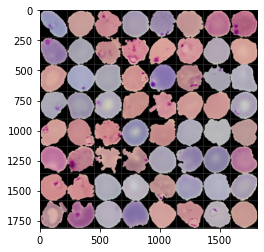

parasitized uninfected parasitized uninfected parasitized uninfected parasitized parasitized parasitized uninfected parasitized parasitized parasitized parasitized uninfected uninfected uninfected parasitized uninfected parasitized parasitized parasitized parasitized uninfected parasitized uninfected parasitized uninfected parasitized uninfected uninfected parasitized parasitized parasitized parasitized uninfected uninfected uninfected parasitized uninfected uninfected parasitized parasitized parasitized uninfected uninfected uninfected uninfected parasitized parasitized uninfected uninfected parasitized uninfected parasitized uninfected parasitized parasitized uninfected parasitized uninfected parasitized parasitized uninfected


In [ ]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch)))

Transfer Learning

In [ ]:
model = torchvision.models.resnet18(pretrained=False)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.fc = nn.Linear(in_features=512, out_features=2)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model(images)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([[ 0.0019,  0.2558],
        [ 0.0812,  0.2493],
        [ 0.1206,  0.4734],
        [-0.0725,  0.3229],
        [-0.0191,  0.3265],
        [-0.0172,  0.3608],
        [-0.0165,  0.2629],
        [-0.0573,  0.2021],
        [ 0.2077,  0.2355],
        [-0.0624,  0.2693],
        [-0.1159,  0.3952],
        [-0.0958,  0.4537],
        [ 0.1002,  0.4677],
        [ 0.0792,  0.5022],
        [-0.1647,  0.1011],
        [ 0.1405,  0.1269],
        [ 0.0605,  0.1403],
        [-0.0118,  0.4369],
        [-0.0016,  0.2262],
        [ 0.0674,  0.3698],
        [ 0.0363,  0.3316],
        [ 0.0360,  0.2342],
        [-0.0622,  0.2198],
        [ 0.0072,  0.3818],
        [-0.0244,  0.3259],
        [ 0.0552,  0.2620],
        [ 0.0343,  0.4674],
        [ 0.2156,  0.2890],
        [-0.0082,  0.3264],
        [ 0.1201,  0.3213],
        [ 0.0359,  0.3552],
        [ 0.0234,  0.3466],
        [ 0.1544,  0.4090],
        [ 0.1720,  0.1495],
        [-0.0613,  0.5682],
        [ 0.0169,  0

**TRAINING**

In [ ]:
#check if cuda available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
step = 0
loss_train = []
loss_val = []

#import the model
net = torchvision.models.resnet18()
net = net.to(device)
net = net.train()

min_loss = 100
patience = 5
training_loss_store = []
validation_loss_store = []

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
file = open('logs_test4_epoch100_with_max_pool.txt', 'w')

print('training started.............................................')
file.write('training started.............................................\n')
start_time = time.time()
for epoch in range(3):  # loop over the dataset multiple times
    #file.write('##############################TRAINING###############################\n')
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        step+=1
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device),data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss_train.append(loss.item())
        training_loss_store.append([epoch, loss.item()])
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.5f' %(epoch + 1, i + 1, running_loss / 2000))
            #log_loss_summary(logger, loss_train, step, prefix = 'train_')
            file.write('epoch = '+ str(epoch + 1) + '\t' +'step = '+ str(step) +'\t'+'train_loss = '+'\t'+str(np.mean(loss_train)) +'\n')
            loss_train = []
            running_loss = 0.0
            
    print('Finished training for epoch ' + str(epoch) + ' time taken = ' + str(time.time() - start_time))
    file.write('Finished training for epoch ' + str(epoch) + ' time taken = ' + str(time.time() - start_time) + '\n')
    file.write('##################################evaluation##############################\n')
    print('################################evaluation###########################\n')
    with torch.no_grad():
        val_loss = 0
        net.eval()
        
        for i, data in enumerate(testloader, 0):
            step+=1
            inputs, labels = data[0].to(device),data[1].to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss_val.append(loss.item())
            validation_loss_store.append([epoch, loss.item()])
            val_loss += loss
            
        val_loss = val_loss/float(i + 1)
        
        if val_loss < min_loss:
            min_loss = val_loss
            no_impr_epoch = 0
            
            #save the best model
            #torch.save(net.state_dict(), 'weight/' + 'epoch_' + str(epoch+1) + 'loss_' + str(val_loss) + '.pt')
            print(str(val_loss))
            torch.save(net.state_dict(), 'xyz_epoch_'+str(epoch+1)+'.pt')
            
            print('performance improved with validation loss ' + str(val_loss))
            file.write('--------------------------------------------------------------------\n')
            file.write('performance improved with validation loss =  ' + str(val_loss) + '\n')
            
            file.write('epoch = '+ str(epoch + 1) + '\t' +'step = '+ str(step) +'\t'+'val_loss = '+'\t'+str(np.mean(loss_val)) +'\n')
            file.write('--------------------------------------------------------------------\n\n')
            #log_loss_summary(logger, loss_val, step, prefix="val_")
            loss_val = []
        else:
            no_impr_epoch += 1
            print('no improvement with prev best model ' + str(no_impr_epoch) + 'th')
            file.write('no improvement with prev best model ' + str(no_impr_epoch) + 'th \n')
            
        if no_impr_epoch > patience:
            print('stop training')
            file.write('stop training')
            break
    
print('Finished Training................................................')
file.write('Finished Training................................................\n')
end_time = time.time()
file.write('Training time:- ' + str(end_time - start_time))
file.close()

training started.............................................
[1,    20] loss: 0.03004
[1,    40] loss: 0.00638
[1,    60] loss: 0.00626
[1,    80] loss: 0.00585
[1,   100] loss: 0.00541
[1,   120] loss: 0.00515
[1,   140] loss: 0.00398
[1,   160] loss: 0.00325
[1,   180] loss: 0.00249
[1,   200] loss: 0.00211
[1,   220] loss: 0.00220
[1,   240] loss: 0.00200
[1,   260] loss: 0.00162
[1,   280] loss: 0.00186
[1,   300] loss: 0.00174
Finished training for epoch 0 time taken = 4788.461629629135
################################evaluation###########################

tensor(0.1651)
performance improved with validation loss tensor(0.1651)


In [ ]:

PATH = 'xyz_epoch_1.pt'
model = torchvision.models.resnet18()
model.load_state_dict(torch.load(PATH))
model.eval()

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

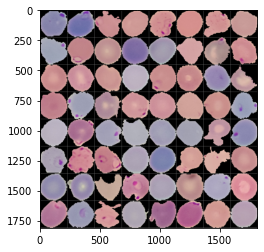

Ground Truth:  parasitized parasitized parasitized uninfected parasitized uninfected parasitized uninfected parasitized parasitized uninfected uninfected uninfected uninfected parasitized parasitized uninfected uninfected uninfected uninfected parasitized uninfected uninfected parasitized uninfected parasitized uninfected parasitized uninfected uninfected uninfected parasitized uninfected parasitized parasitized parasitized uninfected uninfected uninfected parasitized parasitized parasitized parasitized uninfected uninfected uninfected parasitized uninfected uninfected uninfected uninfected parasitized uninfected uninfected parasitized uninfected parasitized parasitized parasitized uninfected parasitized parasitized uninfected uninfected


In [ ]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('Ground Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch)))

In [ ]:
outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(batch)))

Predicted:  parasitized parasitized parasitized uninfected parasitized uninfected parasitized uninfected parasitized parasitized uninfected uninfected uninfected uninfected parasitized parasitized uninfected uninfected uninfected uninfected parasitized uninfected uninfected uninfected uninfected parasitized uninfected parasitized uninfected uninfected uninfected parasitized uninfected parasitized parasitized uninfected uninfected uninfected uninfected parasitized parasitized parasitized parasitized uninfected uninfected uninfected parasitized uninfected uninfected uninfected uninfected parasitized uninfected uninfected parasitized uninfected parasitized uninfected parasitized uninfected uninfected parasitized uninfected uninfected


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0], data[1]
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 27758 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 27758 test images: 95 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(2):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of parasitized : 90 %
Accuracy of uninfected : 93 %
